In [1]:
from pyforest import*
lazy_imports()

['import cv2',
 'from sklearn.model_selection import RandomizedSearchCV',
 'from scipy import signal as sg',
 'import nltk',
 'from fbprophet import Prophet',
 'from sklearn.linear_model import Lasso',
 'from sklearn.linear_model import ElasticNetCV',
 'import tqdm',
 'from sklearn.preprocessing import OneHotEncoder',
 'from sklearn.linear_model import Ridge',
 'import imutils',
 'import keras',
 'from xlrd import open_workbook',
 'from PIL import Image',
 'from sklearn.model_selection import train_test_split',
 'from sklearn.model_selection import GridSearchCV',
 'import pandas as pd',
 'from dask import dataframe as dd',
 'from sklearn.impute import SimpleImputer',
 'import tensorflow as tf',
 'import glob',
 'from openpyxl import load_workbook',
 'import plotly as py',
 'from pyspark import SparkContext',
 'import statsmodels.api as sm',
 'import awswrangler as wr',
 'from sklearn import metrics',
 'from sklearn.cluster import KMeans',
 'from sklearn.ensemble import GradientBoosting

In [57]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
Data=pd.read_csv('breast_cancer.csv')
Data.head()

<IPython.core.display.Javascript object>

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Data Preprocessing

In [77]:
Data.shape

(699, 11)

In [78]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
clump_thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
bland_chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [79]:
Data.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [80]:
Data.isnull().sum()

id                   0
clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
class                0
dtype: int64

In [81]:
Data['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [82]:
Data['bare_nucleoli'] = Data['bare_nucleoli'].fillna(median_value)

In [29]:
# digits_in_bare_nucleoli = pd.DataFrame(data.bare_nucleoli.str.isdigit())
# # digits_in_bare_nucleoli
# alternative way of doing this

In [83]:
Data['bare_nucleoli']

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare_nucleoli, Length: 699, dtype: object

In [84]:
# Convert 'bare_nucleoli' column to integer type
Data['bare_nucleoli'].isnull().sum()


0

In [85]:
Data.head(30)

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [86]:
Data.dtypes


id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [88]:
median_value = Data['bare_nucleoli'].median()
Data['bare_nucleoli'] = Data['bare_nucleoli'].fillna(median_value)


In [93]:
Data['bare_nucleoli'] = pd.to_numeric(Data['bare_nucleoli'], errors='coerce')

# Step 3: Convert the column to an integer type
Data['bare_nucleoli'] = Data['bare_nucleoli'].astype('int64')

<IPython.core.display.Javascript object>

In [94]:
Data.dtypes

id                   int64
clump_thickness      int64
size_uniformity      int64
shape_uniformity     int64
marginal_adhesion    int64
epithelial_size      int64
bare_nucleoli        int64
bland_chromatin      int64
normal_nucleoli      int64
mitoses              int64
class                int64
dtype: object

# Exploratory Data Analysis

In [90]:
Data.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [95]:
Data.drop('id',axis=1,inplace=True)

In [96]:
Data.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [97]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nucleoli,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


### Bivaraiate Data Analysis

<Axes: xlabel='class', ylabel='Density'>

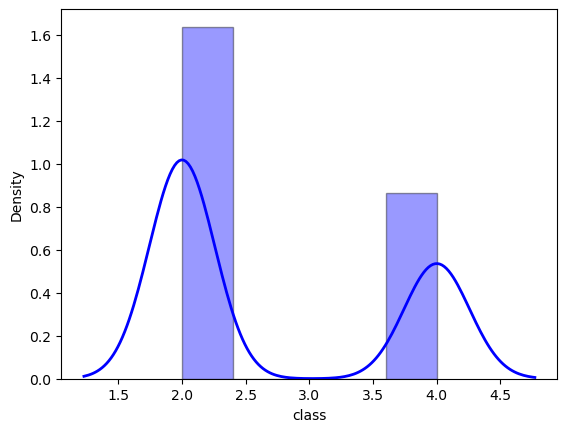

In [98]:
sns.distplot(Data['class'], hist=True, kde=True, color='blue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 2})


## Multivariate Data Analysis

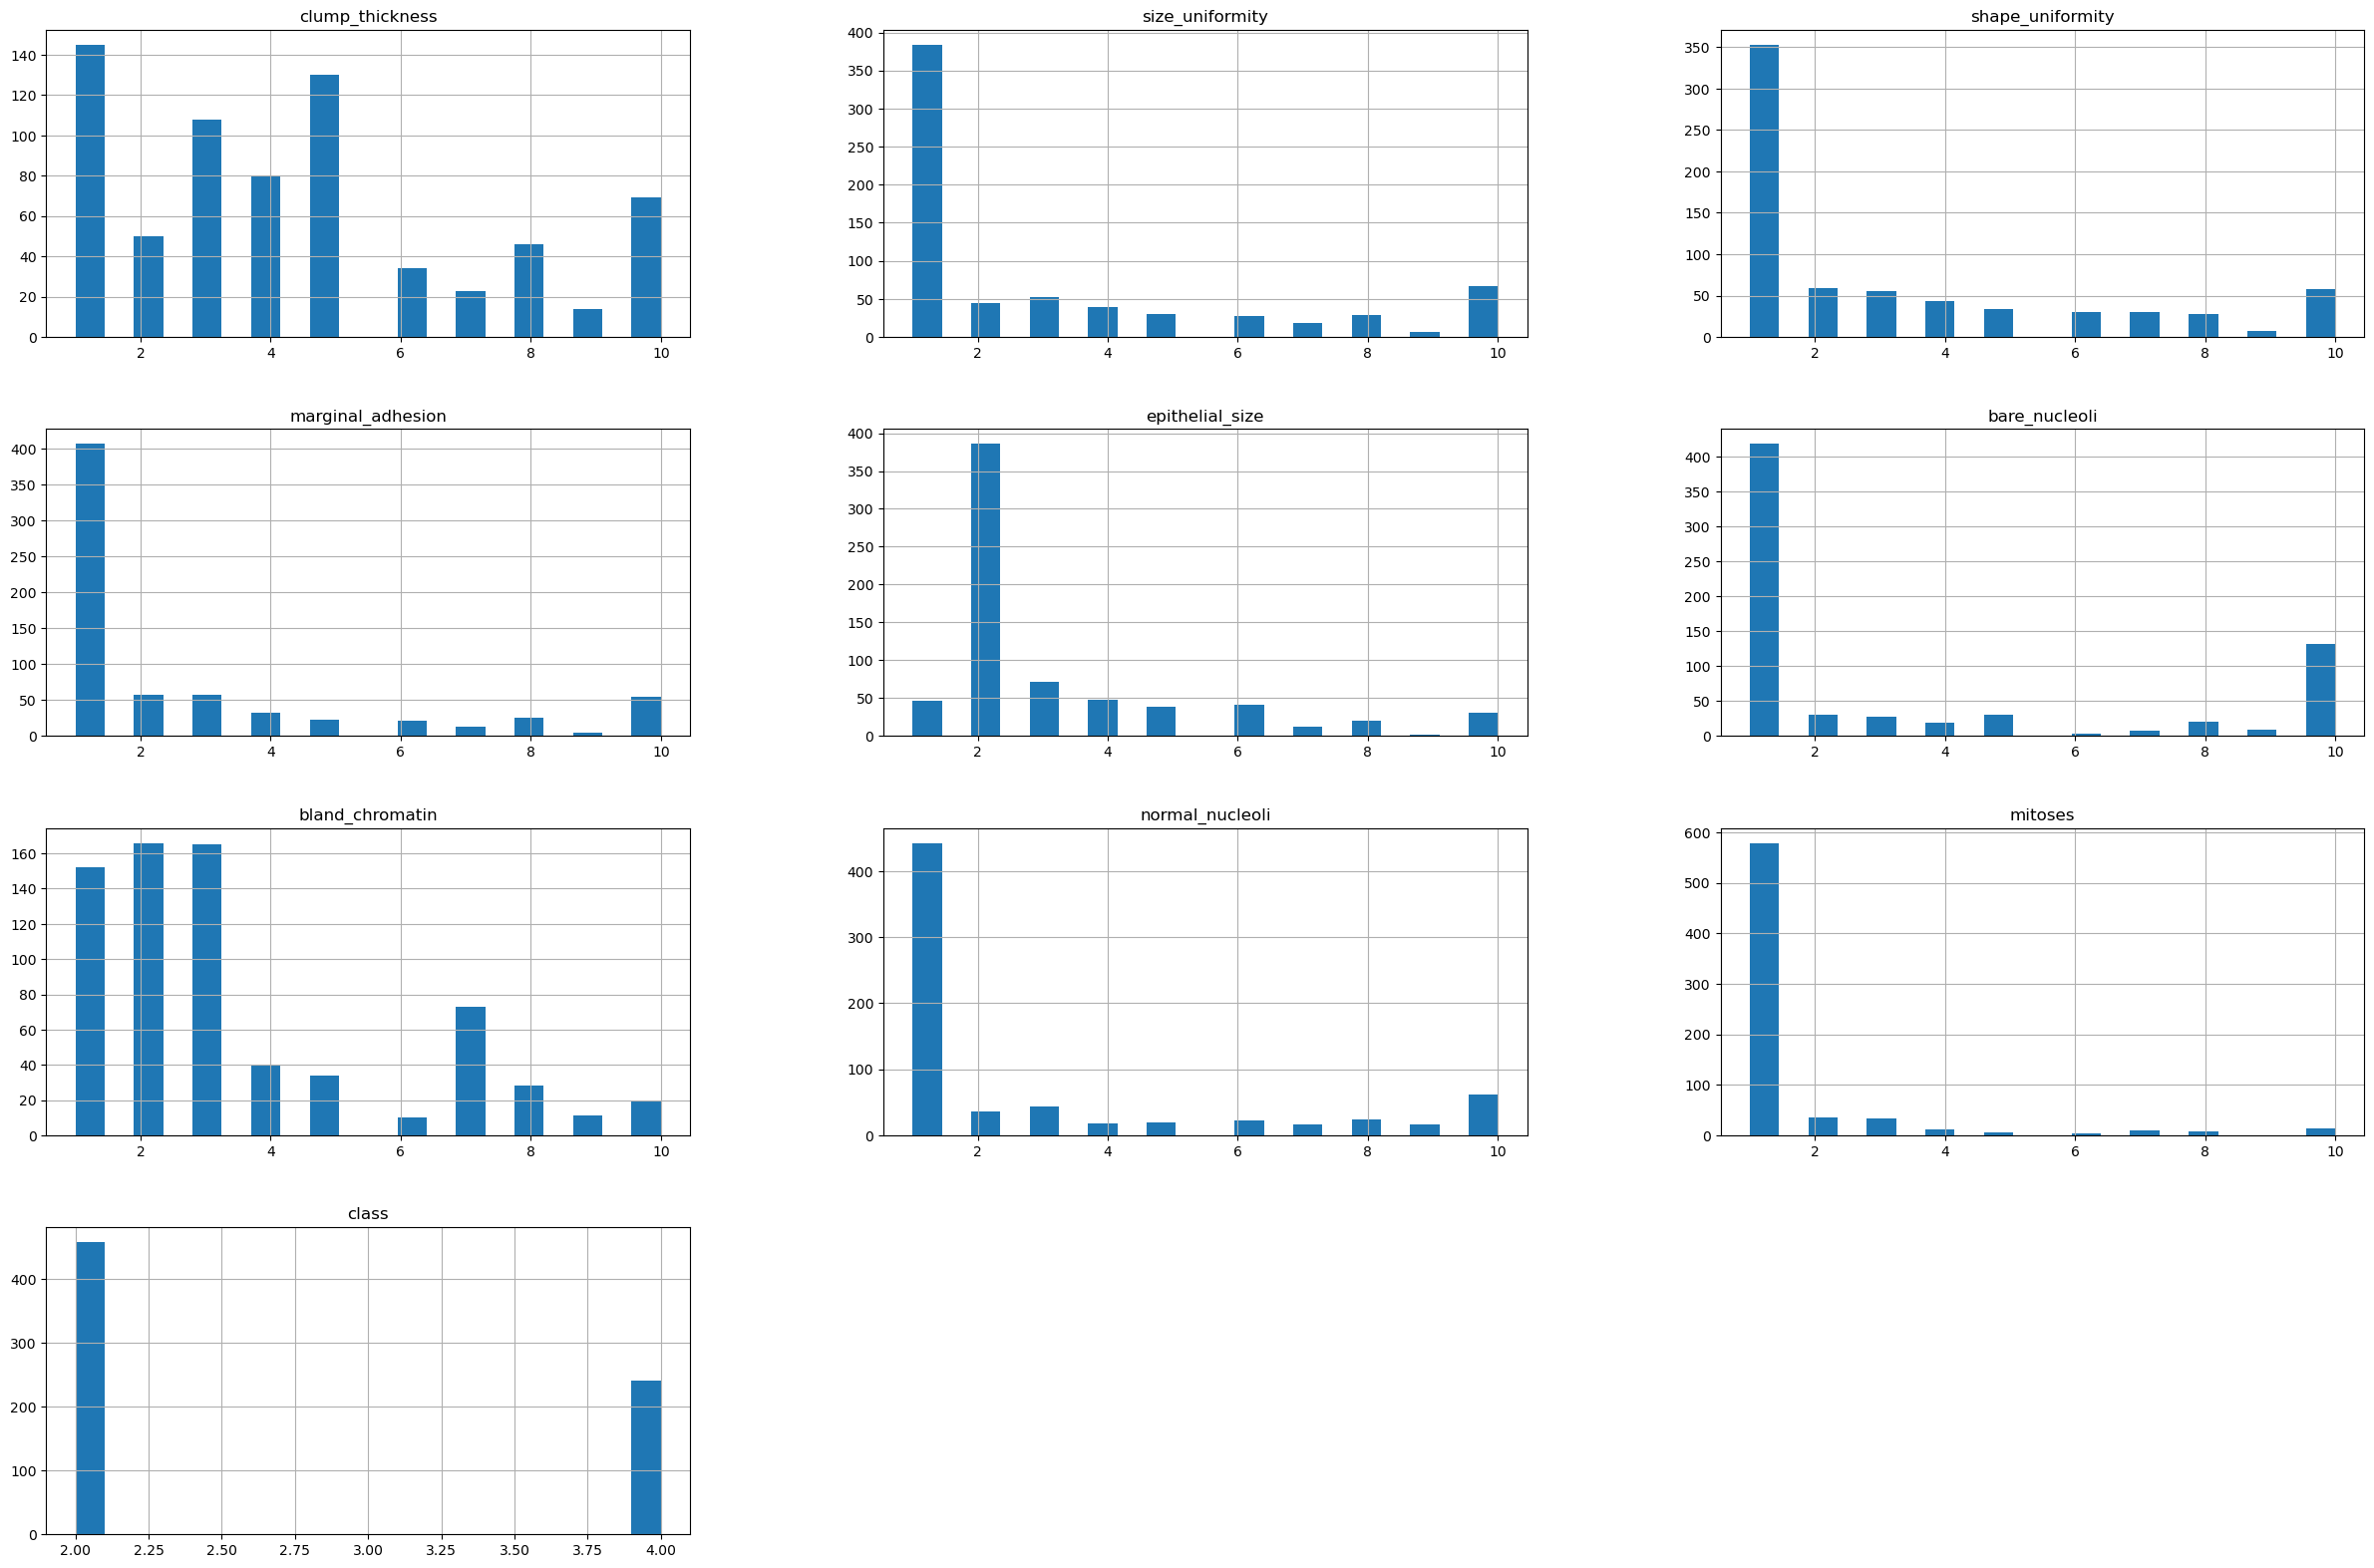

In [99]:
Data.hist(bins=20,figsize=(30,30),layout=(6,3));

<Axes: >

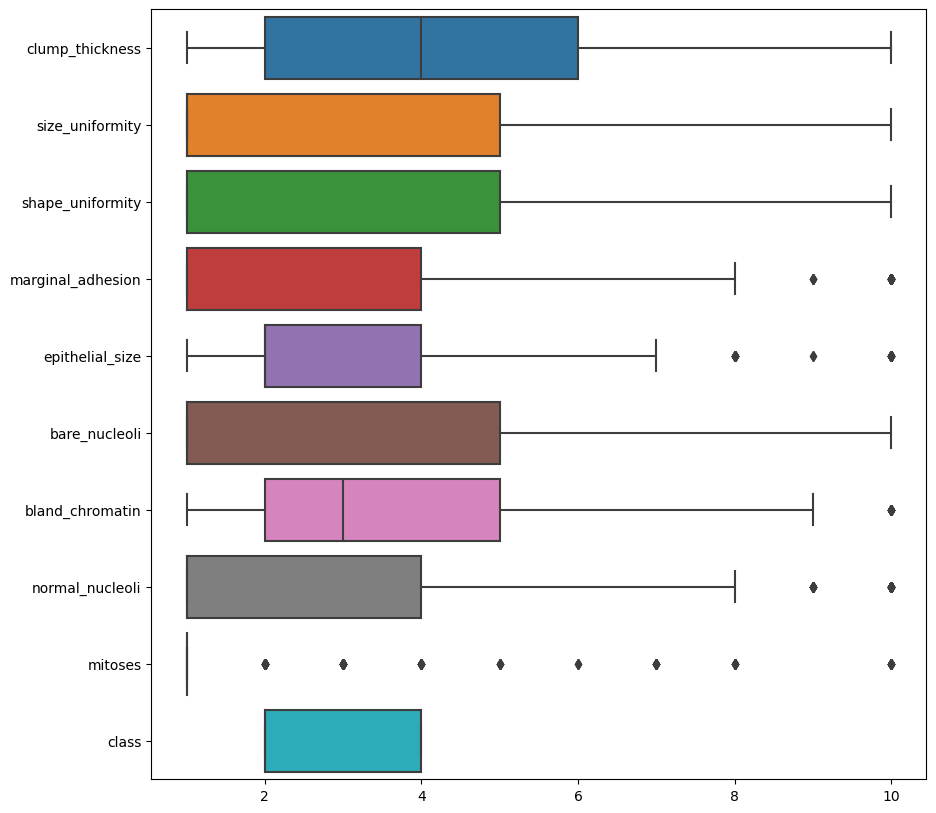

In [100]:
plt.figure(figsize=(10,10))
sns.boxplot(data=Data,orient='h')

In [101]:
Data.corr()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
size_uniformity,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
shape_uniformity,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
bare_nucleoli,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


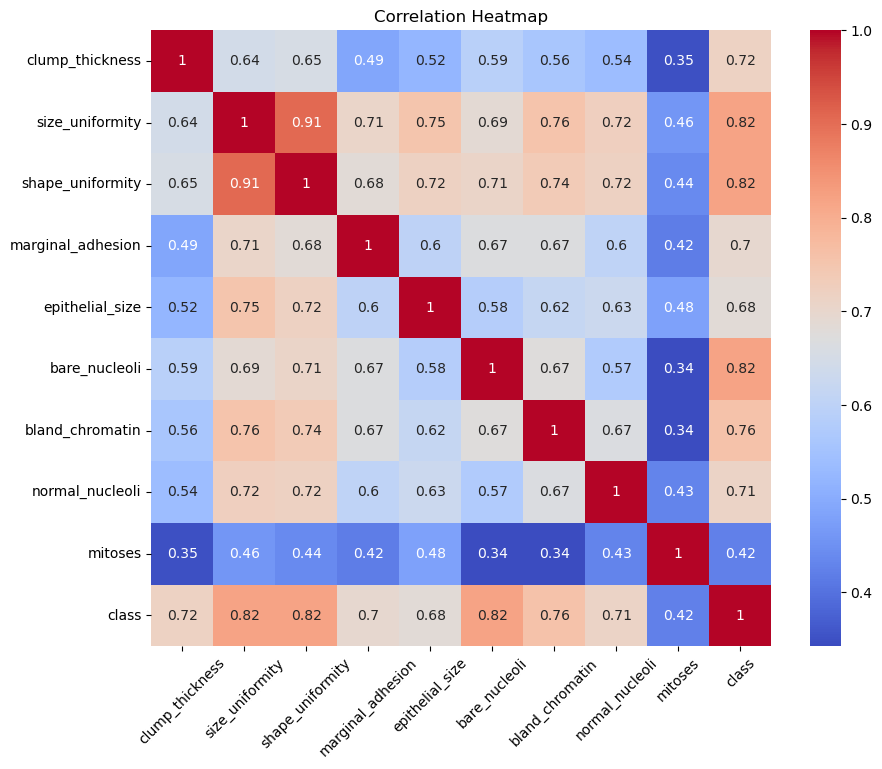

In [102]:
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(Data.corr(), annot=True, cmap='coolwarm');
plt.xticks(rotation=45);
plt.title('Correlation Heatmap');


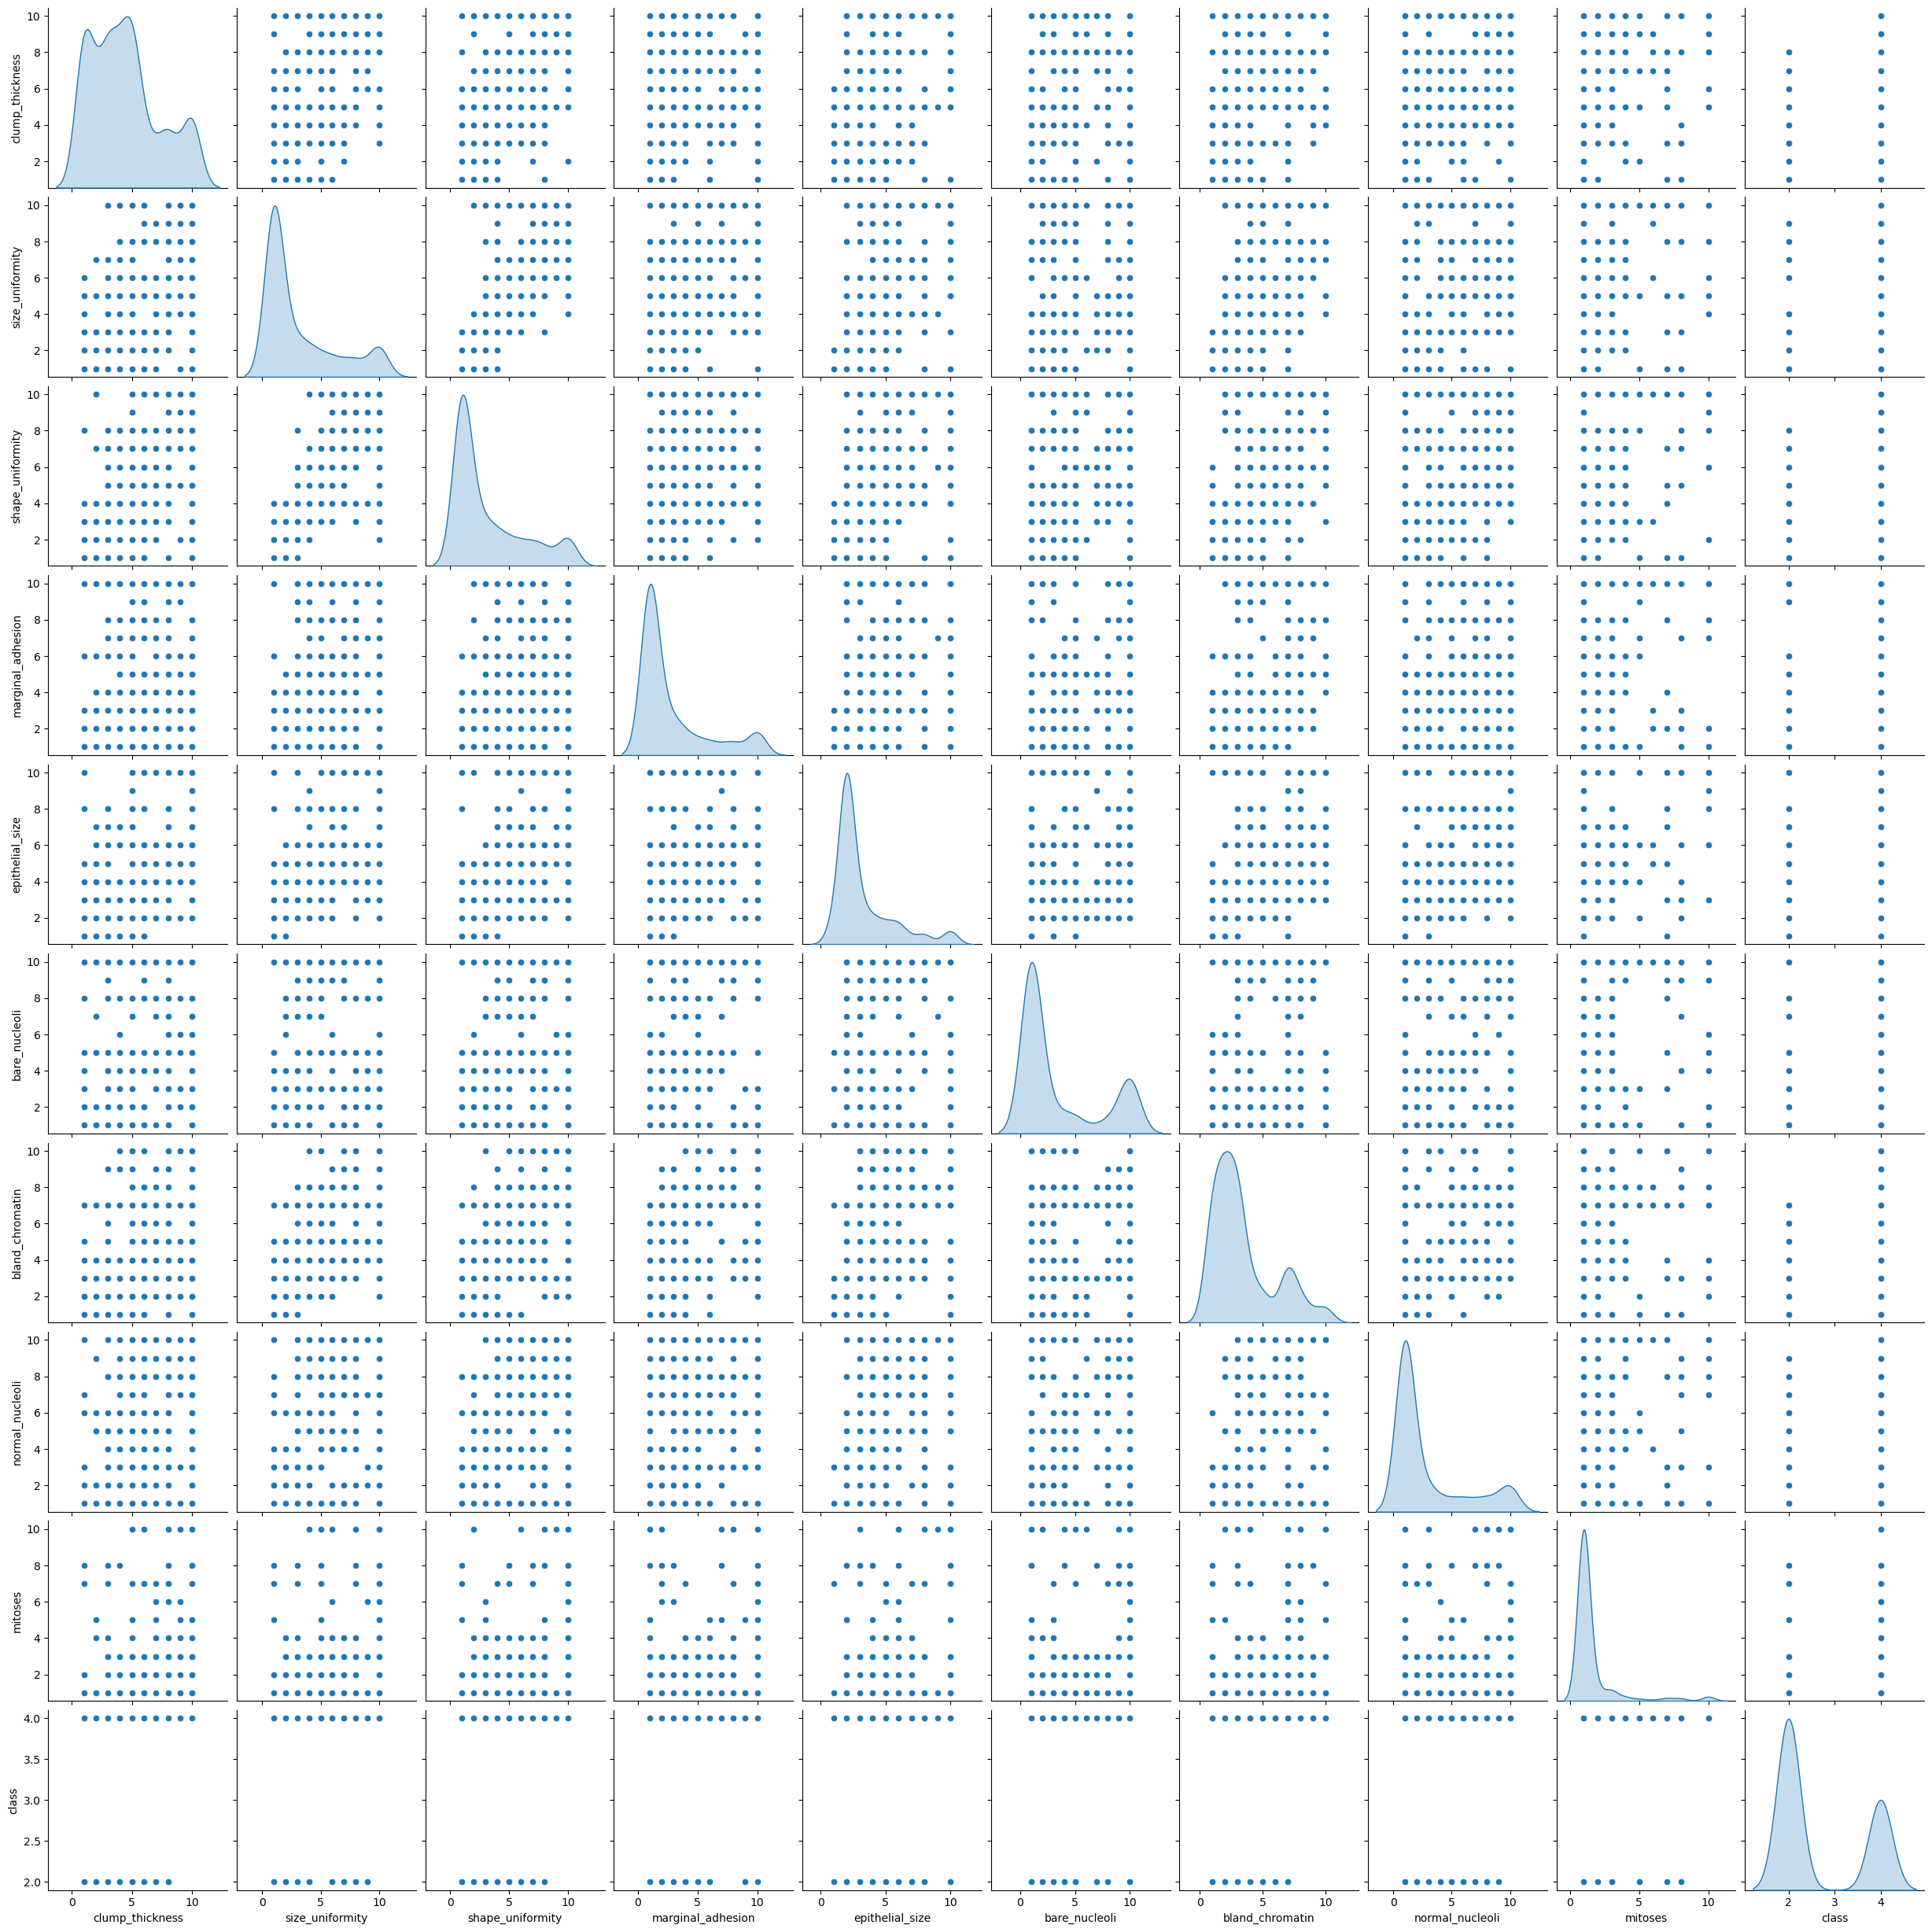

In [103]:
sns.pairplot(Data,diag_kind='kde')

<br>


## Building Our Model

In [104]:
Data.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [105]:
x=Data.drop('class',axis=1)
y=Data['class']

In [108]:
x.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [109]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: class, dtype: int64

In [110]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

## KNeighbors Classifier

In [112]:
from sklearn.neighbors import KNeighborsClassifier

In [114]:
model=KNeighborsClassifier(n_neighbors=5,weights='distance')

In [115]:
model.fit(x_train,y_train)

KNeighborsClassifier(weights='distance')

In [116]:
model.predict(x_train)

array([4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4,
       4, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 4, 2,
       2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4,
       2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4,
       2, 2, 2, 2, 2, 4, 4, 2, 4, 4, 2, 4, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2,
       4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 4,
       4, 2, 2, 2, 2, 4, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 4, 4, 2,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2,
       4, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 2, 4, 2, 4,

In [119]:
prediction=model.predict(x_test)

In [120]:
prediction

array([2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4,
       4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2], dtype=int64)

In [125]:
print(f"KNN Classifier Algorithm is predicting at training data: {model.score(x_train, y_train)*100:.2f}")

KNN Classifier Algorithm is predicting at training data: 100.00


In [126]:
from scipy.stats import zscore
print(f"KNN Classifier Algorithm is predicting at: {model.score(x_test, y_test)*100:.2f}")


KNN Classifier Algorithm is predicting at: 97.62


## Support Vector Machine

In [137]:
from sklearn.svm import SVC
model_1=SVC(gamma=0.025,C=3)
model_1.fit(x_train,y_train)

SVC(C=3, gamma=0.025)

In [139]:
prediction_2=model_1.predict(x_test)

In [140]:
prediction_2

array([2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4,
       4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2], dtype=int64)

In [144]:
print("The Score of SVM is : {:.2f}".format(model_1.score(x_test, y_test) * 100))


The Score of SVM is : 98.10


In [145]:
print("The Score of SVM is : {:.2f}".format(model_1.score(x_train, y_train) * 100))


The Score of SVM is : 98.36


In [161]:
KNNprediction=pd.DataFrame(prediction)
SVCprediction=pd.DataFrame(prediction_2)

In [162]:
pred_df=pd.concat([KNNprediction,SVCprediction],axis=1)

In [166]:
pred_df.columns=['KNNprediction','SVCprediction']

In [167]:
pred_df

,KNNprediction,SVCprediction
0,2,2
1,2,2
2,2,2
3,4,4
4,2,2
...,...,...
205,4,4
206,4,4
207,2,2
208,2,2


In [170]:
from sklearn.metrics import classification_report

In [173]:
print('KNN Classification Report')
print(classification_report(y_test,prediction))

KNN Classification Report
              precision    recall  f1-score   support

           2       0.97      0.99      0.98       137
           4       0.99      0.95      0.97        73

    accuracy                           0.98       210
   macro avg       0.98      0.97      0.97       210
weighted avg       0.98      0.98      0.98       210



In [174]:
print('SVC Classification Report')
print('...'*10)
print(classification_report(y_test,prediction_2))

SVC Classification Report
..............................
              precision    recall  f1-score   support

           2       0.99      0.99      0.99       137
           4       0.97      0.97      0.97        73

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210



Confusion Metrics for KNN


<Axes: >

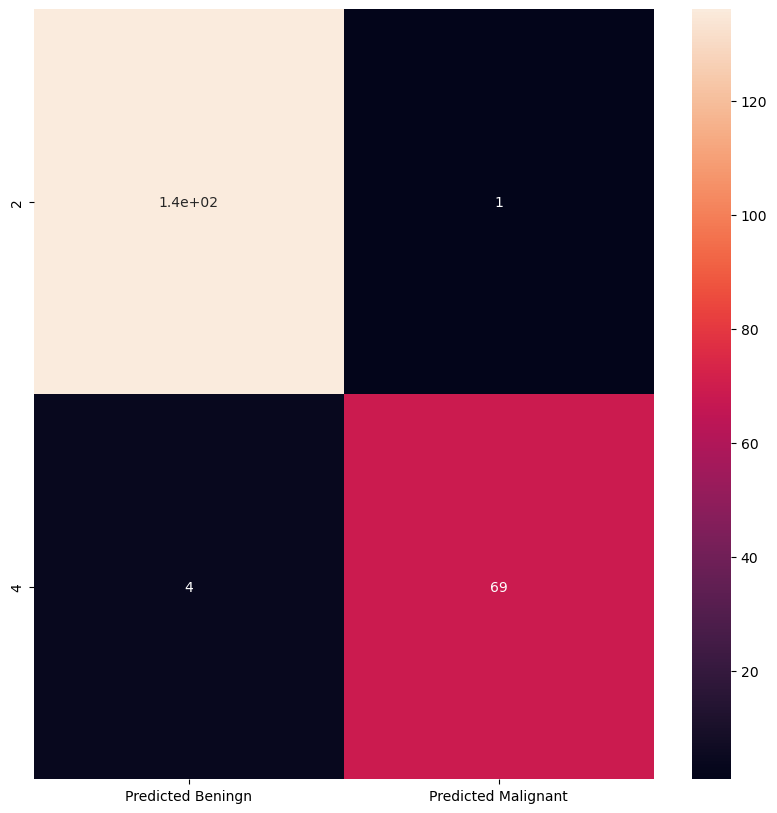

In [179]:
from sklearn import metrics
print("Confusion Metrics for KNN")
cm=metrics.confusion_matrix(y_test,prediction,labels=[2,4])
cm_df=pd.DataFrame(cm,index=[i for i in [2,4]],columns=[i for i in ['Predicted Beningn','Predicted Malignant']])
plt.figure(figsize=(10,10))
sns.heatmap(cm_df,annot=True)

Confusion Matrix for SVC


<Axes: >

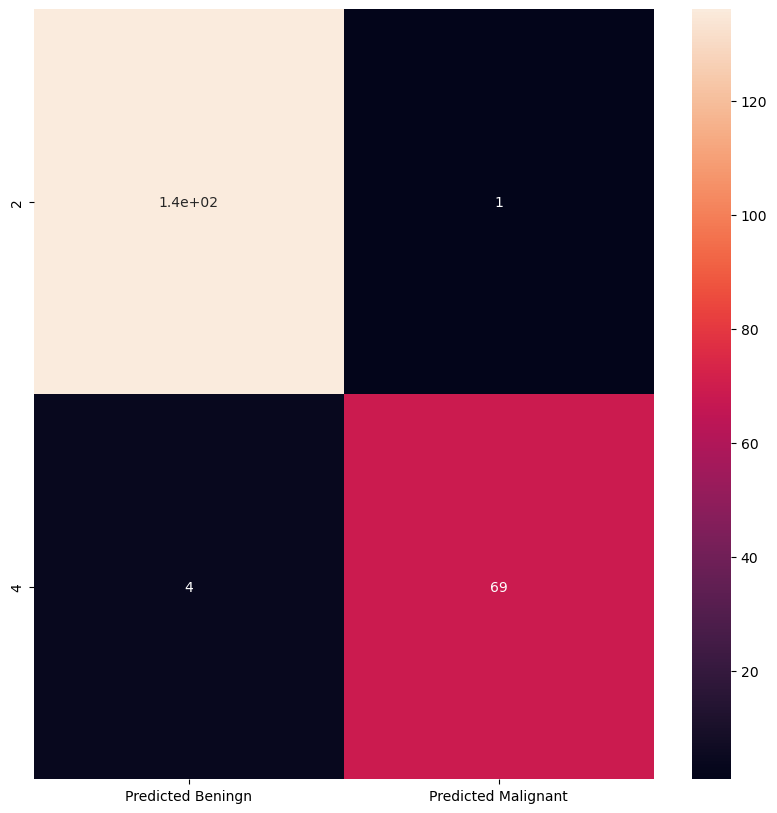

In [181]:
print("Confusion Matrix for SVC")
cm=metrics.confusion_matrix(y_test,prediction_1,labels=[2,4])
cm_df=pd.DataFrame(cm,index=[i for i in [2,4]],columns=[i for i in ['Predicted Beningn','Predicted Malignant']])
plt.figure(figsize=(10,10))
sns.heatmap(cm_df,annot=True)

So here we go!
SVC Classifier is best in this case for prediction